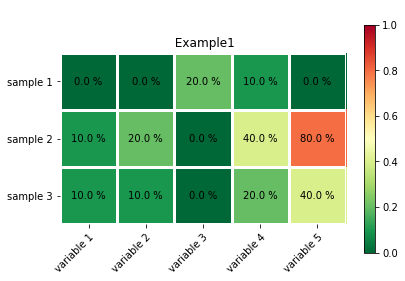

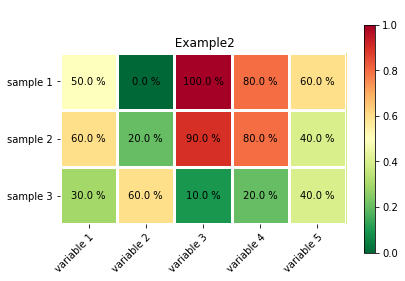

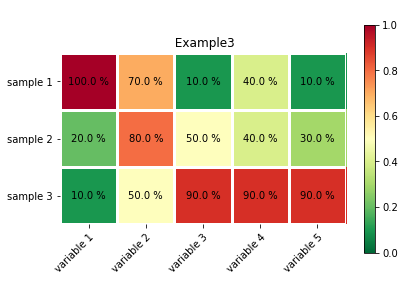

In [4]:
# ANNOTATED HEATMAP USING IMSHOW  


import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy


# Examples of blood abnormalities

X = ["variable 1", "variable 2", "variable 3", "variable 4", "variable 5"]
Y = ["sample 1", "sample 2", "sample 3" ]
DATA1 = np.array([[0, 0, 0.2, 0.1, 0],[0.1, 0.2, 0.0, 0.4, 0.8], [0.1, 0.1, 0.0, 0.2, 0.4]   ] )
DATA2 = np.array([[0.5, 0, 1.0, 0.8, 0.6],[0.6, 0.2, 0.9, 0.8, 0.4] , [0.3, 0.6, 0.1, 0.2, 0.4]] )
DATA3 = np.array([[1, 0.7, 0.1, 0.4, 0.1],[0.2, 0.8, 0.5, 0.4, 0.3], [0.1, 0.5, 0.9, 0.9, 0.9]] )


#--------------------------------------------------------------------
# Function that generates an annotated heatmap and saves it
#--------------------------------------------------------------------

def HeatmapPrint(X,Y, DATA, Title ):
    # variables names
    # X -> the colums names, Y -> the rows names, DATA a list of lists with the data to plot
    # path -> the location path to save figure with name of figure
    # Title -> a string that describes what it stands for
    plt.close()
    fig, ax = plt.subplots()
    im = ax.imshow(DATA, cmap = "RdYlGn_r", vmin=0, vmax=1 )
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, cmap = "RdYlGn_r")
    # We want to show all ticks...
    ax.set_xticks(np.arange(DATA.shape[1]))
    ax.set_yticks(np.arange(DATA.shape[0]))
    ax.set_xticklabels(X)
    ax.set_yticklabels(Y)
    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xticks(np.arange(DATA.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(DATA.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    # Let the horizontal axes labeling appear on top if we want do do this.
    #    ax.tick_params(top=True, bottom=False,
    #                   labeltop=True, labelbottom=False)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation = 45, ha="right",  rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    for i in range(len(Y)):
        for j in range(len(X)):
            Valueij = str(round(DATA[i, j]*100, 0)) + " %"
            text = ax.text(j, i, Valueij, ha="center", va="center", color="k")
    ax.set_title(Title)
    fig.tight_layout()
    return plt.show()
#--------------------------------------------------------------------


# Calling function to generate plots of the 3 examples

EXAMPLES = [DATA1, DATA2, DATA3 ]

for n, data in enumerate(EXAMPLES):
    Title = "\n\n Example" + str(n+1)
    HeatmapPrint(X,Y, data, Title )
    

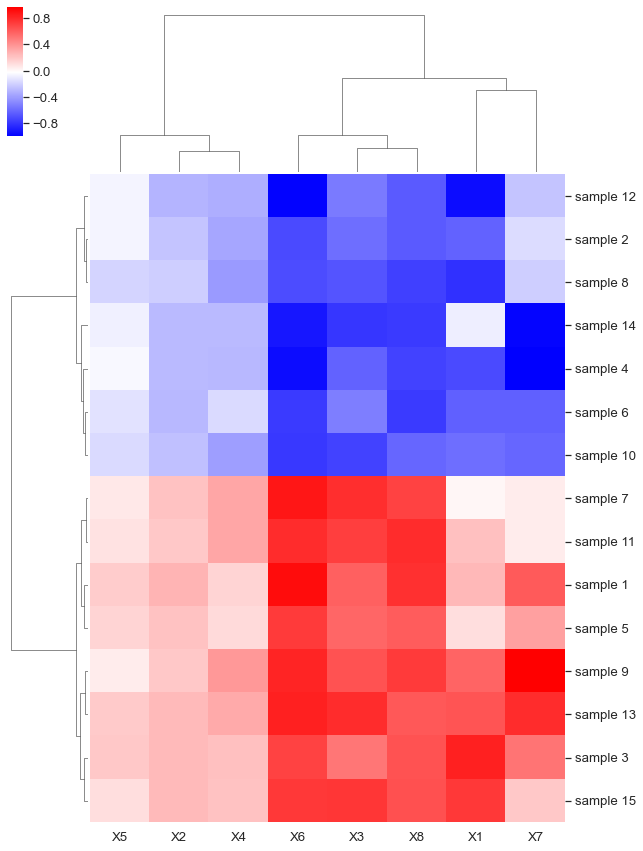

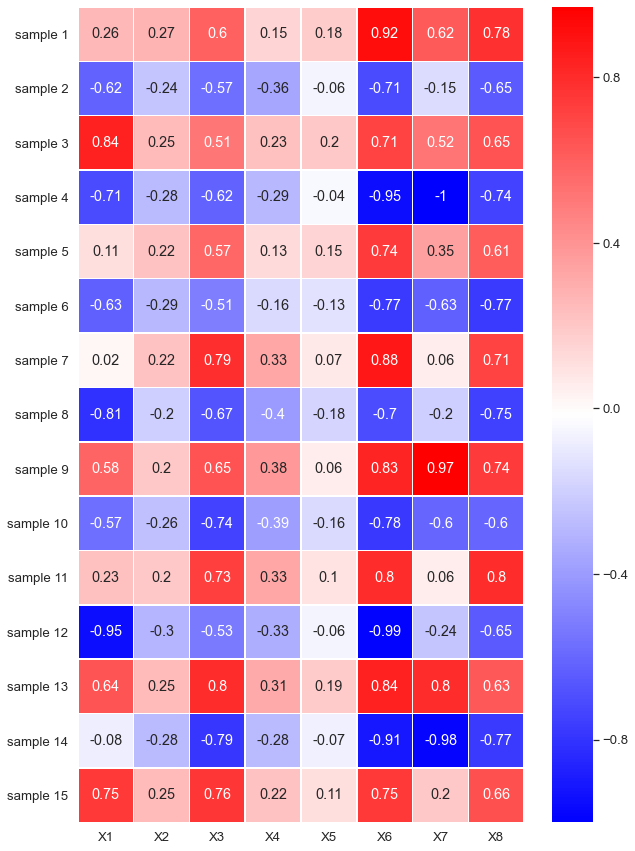

In [9]:
# MAKING A HEATMAP WITH CLUSTERING CLADOGRAMS USING SEABORN


# required libraries and methods
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 15)
plt.style.use('ggplot')
import random 


# making a dummy dataframe for ploting using random generation of variability across 15 samples 
DATAtoPlot = pd.DataFrame({ "X1" :  [ random.randint(1,100) /100 * (-1)**x for x in range(15) ]   , 
                            "X2" : [ random.randint(20,30) /100 * (-1)**x for x in range(15) ]  ,
                            "X3"  : [ random.randint(50,80) /100 * (-1)**x   for x in range(15) ]  , 
                            "X4" : [ random.randint(10,40) /100 * (-1)**x  for x in range(15) ] ,
                            "X5" : [ random.randint(1,20) /100 * (-1)**x  for x in range(15) ] ,
                            "X6"  : [ random.randint(70,100) /100 * (-1)**x for x in range(15) ] ,
                            "X7" : [ random.randint(1,100) /100* (-1)**x  for x in range(15) ] ,
                            "X8" : [ random.randint(60,80) /100 * (-1)**x  for x in range(15) ] 
                         }, index= [ "sample " + str(n+1) for n in range(15)  ]   ) 

# generation of the clustering heatmap 
sns.set(font_scale=1.2)
sns.clustermap( DATAtoPlot, metric="euclidean", method="ward", 
               cmap="bwr", figsize=(10,15)  )
plt.show()


# generation of the  heatmap with annotations  
sns.heatmap(DATAtoPlot, linewidths=.5, cmap="bwr", annot = True )
plt.show()